# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 5: The climate system and climate models

### About these notes:

This document uses the interactive [`Jupyter notebook`](https://jupyter.org) format. The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2017 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2017/Notes/index.html).

[Also here is a legacy version from 2015](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

In [1]:
#  Ensure compatibility with Python 2 and 3
from __future__ import print_function, division

___________
## Contents

1. [The climate system and its interactions](#section1)
2. [Simulation versus Parameterization](#section2)
3. [A taxonomy of climate models](#section3)
4. [Introducing the GCM](#section4)
5. [What can we resolve with a 2º atmosphere?](#section5)

____________
<a id='section1'></a>
## 1. The climate system and its interactions
____________

### Definition of the “climate system”:

From the IPCC AR5 report:

> **Climate System:** “The climate system is the highly complex system consisting of five major components: the atmosphere, the hydrosphere, the cryosphere, the lithosphere and the biosphere, and the interactions between them. The climate system evolves in time under the influence of its own internal dynamics and because of external forcings such as volcanic eruptions, solar variations and anthropogenic forcings such as the changing composition of the atmosphere and land use change.”

Which begs some further definitions:

#### Atmosphere

>The gaseous envelope surrounding the Earth. 

#### Hydrosphere

>The component of the climate system comprising liquid surface and subterranean water, such as oceans, seas, rivers, lakes, underground water, etc. 

#### **Biosphere** (terrestrial and marine):
> The part of the Earth system comprising all ecosystems and living organisms… including derived dead organic matter, such as litter, soil organic matter and oceanic detritus. 

#### **Cryosphere**:
> All regions on and beneath the surface of the Earth and ocean where water is in solid form, including sea ice, lake ice, river ice, snow cover, glaciers and ice sheets, and frozen ground (which includes permafrost). 

#### **Lithosphere**: 
> The upper layer of the solid Earth, both continental and oceanic, which comprises all crustal rocks and the cold, mainly elastic part of the uppermost mantle. 

### Let’s think about WHY we should want to include all these “spheres” into our models.

Here are two nice figures from the IPCC AR5 WG1 report:

<img src='http://www.climatechange2013.org/images/figures/WGI_AR5_Fig1-1.jpg' width="800">

>Figure 1.1 | Main drivers of climate change. The radiative balance between incoming solar shortwave radiation (SWR) and outgoing longwave radiation (OLR) is influenced by global climate ‘drivers’. Natural fluctuations in solar output (solar cycles) can cause changes in the energy balance (through fluctuations in the amount of incoming SWR) (Section 2.3). Human activity changes the emissions of gases and aerosols, which are involved in atmospheric chemical reactions, resulting in modified O3 and aerosol amounts (Section 2.2). O3 and aerosol particles absorb, scatter and reflect SWR, changing the energy balance. Some aerosols act as cloud condensation nuclei modifying the properties of cloud droplets and possibly affecting precipitation (Section 7.4). Because cloud interactions with SWR and LWR are large, small changes in the properties of clouds have important implications for the radiative budget (Section 7.4). Anthropogenic changes in GHGs (e.g., CO2, CH4, N2O, O3, CFCs) and large aerosols (>2.5 μm in size) modify the amount of outgoing LWR by absorbing outgoing LWR and re-emitting less energy at a lower temperature (Section 2.2). Surface albedo is changed by changes in vegetation or land surface properties, snow or ice cover and ocean colour (Section 2.3). These changes are driven by natural seasonal and diurnal changes (e.g., snow cover), as well as human influence (e.g., changes in vegetation types) (Forster et al., 2007).

<img src='http://www.climatechange2013.org/images/figures/WGI_AR5_Fig1-2.jpg' width="800">

> Figure 1.2 | Climate feedbacks and timescales. The climate feedbacks related to increasing CO2 and rising temperature include negative feedbacks (–) such as LWR, lapse rate (see Glossary in Annex III), and air–sea carbon exchange and positive feedbacks (+) such as water vapour and snow/ice albedo feedbacks. Some feedbacks may be positive or negative (±): clouds, ocean circulation changes, air–land CO2 exchange, and emissions of non-GHGs and aerosols from natural systems. In the smaller box, the large difference in timescales for the various feedbacks is highlighted.

### The key is that all these processes ultimately affect the planetary energy budget.

Let’s talk about **timescales**.

Note that the IPCC figure only goes out to centuries – deep ocean circulation – but there are many even longer timescales in the climate system.
e.g. growth and decay of ice sheets, geological processes like chemical weathering, continental drift

The choice of which processes to include in a model should therefore be **guided by the timescales of interest**. For example, the IPCC process is primarily concerned with the century timescale – because it is of special concern to human affairs.
So we don’t tend to include ice sheet and geological feedbacks – though coupled ice sheet modeling is becoming more important.


<img src='../images/Primer_Table1.8.png' width="800">

____________
<a id='section2'></a>
## 2. Simulation versus Parameterization
____________

The *Climate Modelling Primer* (4th ed., page 124) defines **parameterization** as

> The process of capturing a physical process through some mathematical relationship between important parameters in the process, but without explicitly modeling all the actual processes. For example, the albedo of leaves might be related to the soil moisture (via some specification of wilting point) but the physical and biological mechanisms in the plant that happen when the leaf wilts are not modelled.

An example from our own work so far: the **greenhouse effect**, which causes the OLR to be much lower than the surface emission, and the equilibrium temperature of the surface to be much warmer than it would otherwise be.

In reality the greenhouse effect arises from the contributions of several different gases, at various levels, to the absorption and emission of longwave radiation. Key greenhouse species include water vapor and cloud droplets, which both strongly tied to the day-to-day variations in weather.

How can we represent this in a climate model?  

### Parameterization

Represent the time-averaged, net effect of the complex radiative transfer process, and its coupling to day-to-day water and cloud variations, with an **empirical relationship**, e.g. 

$$ OLR = \tau \sigma T_s^4 $$

Use observed temperature and OLR to choose an appropriate value for $\tau$ 

(this is what we have done so far)

#### Pro

Simple to implement, easy to understand the result

#### Con

How might the value of $\tau$ change with climate change? We have no way of knowing, and have to make assumptions.

### Simulation:

Solve a large set of coupled equations for the time-dependent behavior of the atmosphere:

- Equations of radiative transfer, with detailed information about the various greenhouse gases
- Equations of fluid motion to predict growth and decay of weather system and movement of water vapor
- Cloud microphysics to predict the formation of cloud droplets and their optical properties

This is essentially what goes on in a so-called GCM (General Circulation Model or Global Climate Model).

#### Pro

Model is based on real physical principles (e.g. Newton’s laws of motion, conservation of mass and energy). It is therefore more likely to remain valid under changing climate conditions.

#### Con

Requires lots of computer resources. Must simulate the weather even though we really just want the climate (statistics of weather!) 

Essentially a **simulation** involves representing (at least some aspects of) the underlying rules that govern the process. *There is a chain of causality linking input to output*.

**Parameterization** involves making assumptions about the **statistical properties** of the process – so we can calculate some relevant statistical properties of the output given the input, without needing to explicitly model the actual events. 

____________
<a id='section3'></a>
## 3. A taxonomy of climate models
____________

### Key components of a climate model

#### Radiation

The way in which the input and absorption of solar radiation and the emission of infrared radiation are handled

#### Dynamics

The movement of energy around the globe by winds and ocean currents (specifically from low to high latitudes) and vertical movements (e.g. small-scale turbulence, convection and deep-water formation)

#### Surface processes

Inclusion of the effects of sea and land ice, snow, vegetation and the resultant change in albedo, emissivity and surface-atmosphere energy and moisture interchanges.

#### Chemistry

The chemical composition of the atmosphere and interactions, including biological, with other components (e.g. carbon exchanges between ocean, land and atmosphere)

#### Resolution (in both time and space)

The timestep of the model and the horizontal and vertical scales resolved.

### The climate modeling pyramid

The edges represent the basic elements of the models, with **complexity increasing upwards**. Around the base of the pyramid are the simpler climate models, which incorporate only one primary process. 

<img src='../images/Primer_Figure2.2.png' width="800">

### Five basic types of climate model

1. Energy Balance Models (EBMs)
2. Radiative-Convective (RC) or Single-Column models (SCMs)
3. "Dimensionally Constrained" models
4. Global Circulation Models (GCMs)
5. Earth System Models (ESMs)

The vertical axis in the pyramid figures shows increasing complexity BOTH in terms of number of processes included and linked together, AND increasing resolution in space and time.

### 1. Energy Balance Models (EBMs)

Zero- or one-dimensional models predicting the surface (strictly the sea-level) temperature as a function of the energy balance of the Earth. 

Simplified relationships are used to calculate the terms contributing to the energy balance in each latitude zone in the one-dimensional case.

*How might we extend our zero-dimensional model to include a latitude dimension? What new kinds of processes might we have to include?*

### 2. Radiative-Convective (RC) or Single-Column models (SCMs)

Focus on processes in the **vertical column**. 

- RC models compute the (usually global average) temperature profile by explicit modelling of **radiation** and **convection** processes, which together determine the *lapse rate. 
- SCMs are single columns 'extracted' from a three-dimensional model and include all the processes that would be modelled in the three-dimensional version but without any of the horizontal energy transfers.

### 3. Dimensionally constrained models

Include the following:

- Statistical-Dynamical (SD) models, deal explicitly with surface processes and dynamics in a zonal average (average around latitude circles) framework and have a vertically resolved atmosphere. 
- Earth-System Models of Intermediate Complexity (EMICs) extend SD models to include interactive chemistry, especially the cycling of carbon between ocean, atmosphere and land.
- Integrated Assessment Models (IAMs) couple the climate system to models of economic activity to more fully assess the impact of particular policy choices affective emissions.


### 4. Global Circulation Models (GCMs)

The **three-dimensional nature** of the atmosphere and ocean is incorporated. 

These models can exists as *fully coupled ocean-atmosphere models* or, for testing and evaluation, as independent ocean or atmospheric circulation models. 

These models attempt to simulate as many processes as possible and produce a three-dimensional picture of the time evolution of the state of the whole climate system. 

Vertical resolution is much finer than horizontal resolution but, even so, the number of layers is usually much less than the number of columns. 

### Fun fact

Depending on who you ask, **GCM** stands for any of the following:

- **General Circulation Model** (the original)
- **Global Climate Model** (more common these days)
- **Global Circulation Model** (possibly the most accurate name)

A GCM was originally a representation of the processes that shape and maintain the **time-average circulation** of the atmosphere, e.g. why are the surface winds, on average, westerly in mid-latitudes and easterly in the tropics?

Distinctions have historically been drawn between **oceanic** and **atmospheric** general circulation models, which are often denoted **OGCM** and **AGCM** respectively. 

As the pyramid is ascended, more processes are integrated to develop a coupled ocean-atmosphere global model, which might be denoted **AOGCM** or **CGCM**.

### 5. Earth System Models

Ascending the pyramid even more and moving forward in climate modeling history, more processes that used to be fixed come to be incorporated into GCMs and the coupling becomes more complete: e.g. changes in biomes and vegetation, chemical changes in atmosphere, ocean and soil.  

Such models are now generally known as **Earth System Models**. 

For brevity we use the generic term GCM to mean any complex three-dimensional model of the atmosphere and ocean and possibly other components, used for climate simulation. We will be more precise where necessary.

### Simple vs. Complex models: their different roles in the science

<img src='http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/Primer_Table2.1.png' width="800">

In this course we are going to work extensively with two kinds of simple one-dimensional model: **EBM**s and **RCM**s. 

Section 2.2.1 and 2.2.2 of the *Primer* give a sneak peak on the ingredients and uses for these models. 

____________
<a id='section4'></a>
## 4. Introducing the GCM
____________

The aim of the GCM is the calculation of the **full three-dimensional character** of the atmosphere and ocean.  

To **simulate** the fluid flow and its effects on other components of the climate system, instead of **parameterizing** the flow.


This requires the solution of a series of equations governing the motion of fluids

- Conservation of energy
- Conservation of momentum, Newton's 2nd law of motion (F=ma) for a moving fluid
- Conservation of mass, for the fluid itself (air or water) as well as any quantities carried by the fluid (e.g. water vapor in the atmosphere, salt in the ocean)
- Equation of state, linking thermodynamic properties of the fluid (e.g. ideal gas law for atmosphere)
- Also, equations for the formation of clouds, sea ice, etc.

Atmospheric Science students will recognize this list - the so-called "governing equations" for the atmosphere. 

These equations are the basis of *numerical weather prediction* as well as climate modeling.

The physical laws are expressed in terms of **differential equations**. 

Just as we saw with the zero-dimensional EBM, we need to approximate the derivatives in order to represent them on a computer.

One way to do this is to divide the Earth into a **series of boxes on a regular grid**. 

The model then represents all the **state variables**, e.g. for the atmosphere

- Temperature
- Wind speed and direction
- Humidity
- Pressure

for each box - essentially a spatial average of these quantities over the box.

The discretized equations are then solved numerically by **timestepping**, (conceptually at least) just like we have already done with the EBM.


<img src='http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/Primer_Figure2.5.png' width="800">

### Evolving complexity of GCMs

<img src='http://www.climatechange2013.org/images/figures/WGI_AR5_Fig1-13.jpg' width="800">

> Figure 1.13 | The development of climate models over the last 35 years showing how the different components were coupled into comprehensive climate models over time. In each aspect (e.g., the atmosphere, which comprises a wide range of atmospheric processes) the complexity and range of processes has increased over time (illustrated by growing cylinders). Note that during the same time the horizontal and vertical resolution has increased considerably e.g., for spectral models from T21L9 (roughly 500 km horizontal resolu- tion and 9 vertical levels) in the 1970s to T95L95 (roughly 100 km horizontal resolution and 95 vertical levels) at present, and that now ensembles with at least three independent experiments can be considered as standard.

<img src='http://www.climatechange2013.org/images/figures/WGI_AR5_Fig1-14.jpg' width="800">

> Figure 1.14 | Horizontal resolutions considered in today’s higher resolution models and in the very high resolution models now being tested: (a) Illustration of the European topography at a resolution of 87.5 × 87.5 km; (b) same as (a) but for a resolution of 30.0 × 30.0 km.

### A hierarchy of complexity for ocean models

<img src="http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/Primer_Figure2.9.png" width="800" alt="Figure 2.9: ocean model hierarchy">

One goal of all this complexity is to do **more simulation** and **less parameterization** in order to get a more accurate prediction of climate change.

In terms of our simple view of planetary energy budget, **we are trying to represent the net climate feedback parameter $\lambda$ correctly**, and so get the correct climate sensitivity.

Ideally this means basing the model on **laws of physics and chemistry**.

However it doesn’t always work this way. In many cases we know that a feedback operates in nature, but we can’t represent it in terms of first principles.

Land surface processes are a good example.

Exchanges of energy, water and carbon between the land and atmosphere are biologically mediated. We must (to a certain extent) rely on empirical relationships. A bit like economic modeling.

We also must deal with interaction across spatial scales.

E.g. cumulus convection and vertical transport of heat and water vapor

____________
<a id='section5'></a>
## 5. What can we resolve with a 2º atmosphere?
____________

The following animation shows contours of sea level pressure in the control simulation. It is based on 6-hourly output from the numerical model.

The atmosphere is simulated with a 2º finite volume dynamical core.

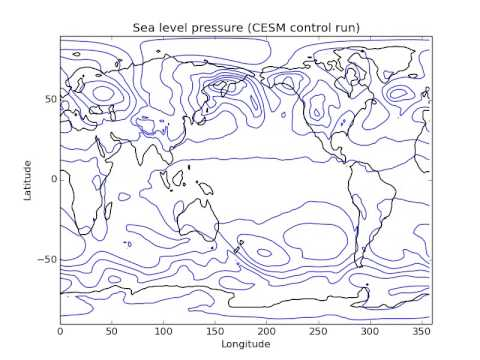

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('As85L34fKYQ')

### Discussion point:
How well does this represent the true general circulation of the atmosphere?

____________

## Citation information
The figures above are reproduced from Chapter 1 of the IPCC AR5 Working Group 1 report.
The report and images can be found online at http://www.climatechange2013.org/report/full-report/

The full citation is:

> Cubasch, U., D. Wuebbles, D. Chen, M.C. Facchini, D. Frame, N. Mahowald and J.-G. Winther, 2013: Introduction. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung, A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 119–158, doi:10.1017/CBO9781107415324.007.
____________


<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Version information
____________

In [3]:
%load_ext version_information
%version_information

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 17.7.0 x86_64 i386 64bit
Tue Feb 05 11:30:55 2019 EST

____________

## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php)

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________